In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset path
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#now we will check if our dataset contains null or missings values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Visualizing the dataset

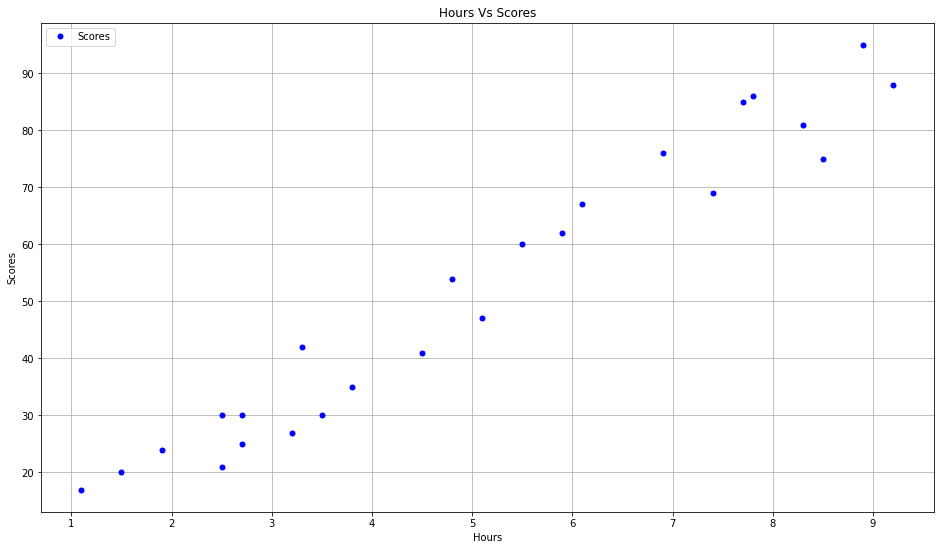

In [ ]:
#Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
data.plot(x='Hours',y='Scores',style='.', color='blue', markersize=10)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

From the graph, we can observe that there is a linear relationship between "Hours" and "Scores".So,we can use the linear regression supervised machine model on it to predict further values.

In [ ]:
# we can also use .corr to determine the correlation between the variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Data preparation**

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#using iloc function we will divide the data
x = data.iloc[:, :1].values
y = data.iloc[:, 1:].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
#Splitting data into training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Training tha Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualizing the data**

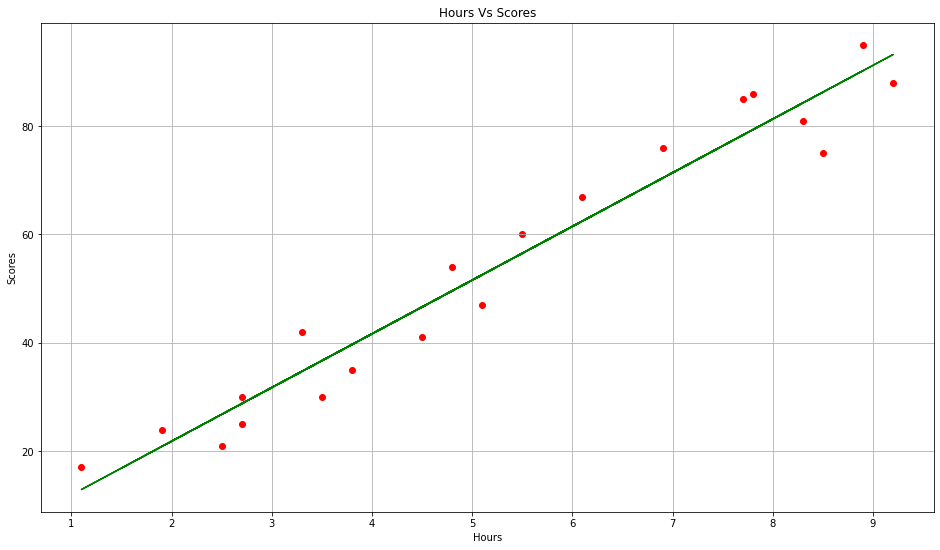

In [ ]:
line = model.coef_*x + model.intercept_

#Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train,y_train, color='red')
plt.plot(x, line, color='green');
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

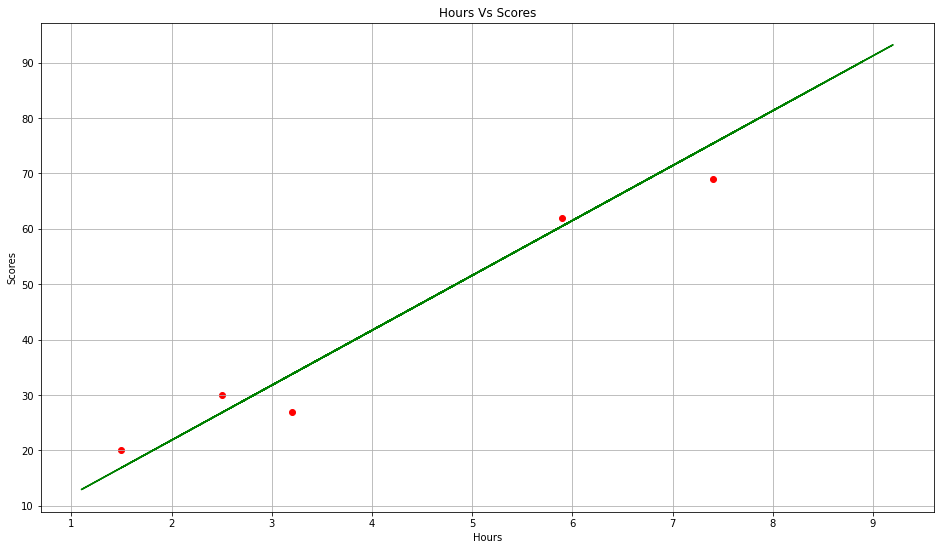

In [ ]:
#Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test,y_test, color='red')
plt.plot(x, line, color='green');
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

**Making Prediction**

In [ ]:
print(x_test)
y_pre=model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [ ]:
y_pre

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
comp =pd.DataFrame({'Actual':[y_test],'Predicted':[y_pre]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [ ]:
#Testing with your own data
hours = 9.25
own_pre = model.predict([[hours]])
print("The predicted scores if a person studies for",hours,"hours is",own_pre[0])

The predicted scores if a person studies for 9.25 hours is [93.69173249]


**Evaluating the model**

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:-", metrics.mean_absolute_error(y_test,y_pre))

Mean Absolute Error:- 4.183859899002982
